<a href="https://colab.research.google.com/github/javilledo/machine-learning/blob/master/notebooks/t04_01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELOS DE REGRESIÓN LINEAL

##MODELO CON DATOS SIMULADOS
  * y = a + b * x

  * x: 100 valores distribuidos siguiendo una N(1.5,2.5)

  * Ye: 5 + 1.9 * x + error

  * e estará distribuida según una N(0,0.8) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Recordemos que para generar una distribución aleatoria con media m y desviación típica s, hay que multiplicar la
#N(0,1) por la s y sumarle la m
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        'x': x_list,
        'y_actual': y_act_list,
        'y_prediccion': y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,-0.435368,4.950043,4.172800
1,5.290755,15.561001,15.052434
2,4.745945,13.253840,14.017296
3,-0.429327,4.452651,4.184279
4,3.396435,10.385932,11.453226


In [9]:
y_mean = [np.mean(y_act) for i in range(0,len(x_list))]
y_mean

[7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220213145,
 7.1130619220

Text(0.5, 1.0, 'Valor actual vs Predicción')

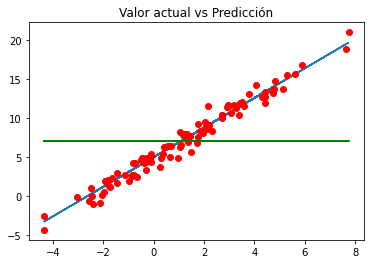

In [10]:
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'],'ro')
plt.plot(data['x'],y_mean,'g')
plt.title('Valor actual vs Predicción')

In [11]:
data['SSR'] = (data['y_prediccion'] -  y_mean) ** 2
data['SSD'] = (data['y_prediccion'] - data['y_actual']) ** 2
data['SST'] = (data['y_actual'] - y_mean) ** 2

In [12]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-0.435368,4.950043,4.172800,8.645139,0.604106,4.678651
1,5.290755,15.561001,15.052434,63.033630,0.258640,71.367676
2,4.745945,13.253840,14.017296,47.668451,0.582865,37.709160
3,-0.429327,4.452651,4.184279,8.577768,0.072023,7.077789
4,3.396435,10.385932,11.453226,18.837026,1.139116,10.711682


In [13]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])
print(SSR)
print(SSD)
print(SST)

2245.540094819345
66.99570721770226
2400.317792302124


In [14]:
SSR + SSD #tendría que ser igual a SST

2312.5358020370472

In [15]:
R2 = SSR/SST
R2

0.935517831022561

(array([ 1.,  0.,  3., 16., 21., 19., 20., 11.,  5.,  4.]),
 array([-2.47287953, -2.01170826, -1.55053698, -1.08936571, -0.62819444,
        -0.16702316,  0.29414811,  0.75531939,  1.21649066,  1.67766193,
         2.13883321]),
 <a list of 10 Patch objects>)

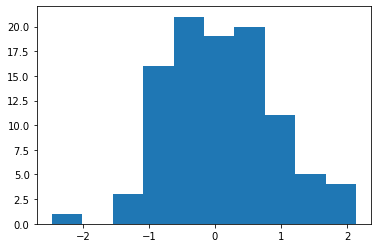

In [16]:
plt.hist(data['y_prediccion'] - data['y_actual'])

Obteniendo la recta de regresión a partir de los datos

y = a + b * x

b = covarianza / varianza

a = y_n - b * x_m

In [17]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean, y_mean

(1.1616525175084624, 7.113061922021315)

In [18]:
data['beta_numerador'] = (data['x'] - x_mean) * (data['y_actual'] - y_mean)
data['beta_denominador'] = (data['x'] - x_mean) ** 2
beta = sum(data['beta_numerador'])/ sum(data['beta_denominador'])
alpha = y_mean - beta * x_mean
alpha, beta

(4.86189442804355, 1.9379009299666634)

y = 5.151499121738837 + 1.9391305328769286 * x

Recordemos que el que habíamos supuesto al principio sera y = 5 + 1.9 * x

In [19]:
data['model'] = alpha + beta * data['x']
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_numerador,beta_denominador,model
0,-0.435368,4.950043,4.172800,8.645139,0.604106,4.678651,3.454386,2.550475,4.018194
1,5.290755,15.561001,15.052434,63.033630,0.258640,71.367676,34.882405,17.049485,15.114853
2,4.745945,13.253840,14.017296,47.668451,0.582865,37.709160,22.010348,12.847155,14.059066
3,-0.429327,4.452651,4.184279,8.577768,0.072023,7.077789,4.232659,2.531215,4.029902
4,3.396435,10.385932,11.453226,18.837026,1.139116,10.711682,7.314153,4.994252,11.443849


In [20]:
SSR_model = sum((data['model'] -  y_mean) ** 2)
SSD_model = sum((data['model'] - data['y_actual']) ** 2)
SST_model = sum((data['y_actual'] - y_mean) ** 2)
R2 = SSR_model/SST_model
R2

0.9728296575739203

Text(0.5, 1.0, 'Valor actual vs Predicción')

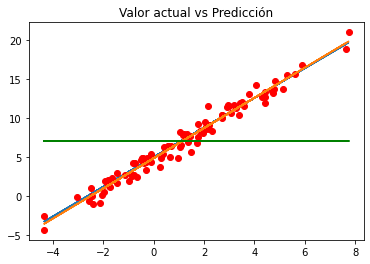

In [21]:
y_mean_array = [y_mean for i in range(0, len(data['x']))]
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'],'ro')
plt.plot(data['x'],data['model'])
plt.plot(data['x'],y_mean_array,'g')
plt.title('Valor actual vs Predicción')

##ERROR ESTÁNDAR DE LOS RESIDUOS (RSE)

In [24]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8268190040672492

In [25]:
y_mean

7.113061922021315